# Firdaus - Data Exploration and Cleanup

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import datetime
from pprint import pprint
import plotly.express as px
from scipy.stats import linregress

In [4]:
parent_folder = 'historical_data'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

In [5]:
master_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [6]:
# Display an overview of the Specie column
master_df["Specie"].unique()

array(['co', 'pm10', 'o3', 'so2', 'no2', 'pm25', 'psi', 'uvi', 'neph',
       'aqi', 'mepaqi', 'pol', 'temperature', 'humidity', 'pressure',
       'wd', 'wind-speed', 'd', 'pm1', 'wind-gust', 'precipitation',
       'dew', 'wind speed', 'wind gust'], dtype=object)

In [7]:
# Display an overview of the number of rows each Specie has in the dataframe
master_df["Specie"].value_counts()

no2              565392
pm25             552899
pm10             547363
o3               541019
so2              469871
co               429370
temperature      338991
humidity         338874
pressure         336973
wind-speed       327923
dew              230768
wind-gust        214730
wd                30465
precipitation     30222
aqi               19417
uvi               14001
wind speed         4517
pol                4243
wind gust          2875
d                  2031
pm1                1560
neph               1537
mepaqi             1298
psi                 363
Name: Specie, dtype: int64

In [8]:
species_to_remove = ["temperature", "humidity", "pressure", "wind-speed", "dew", "wind-gust",
                     "wind speed", "wind gust", "precipitation", "wd", "aqi", "uvi", "pol", "pm1", "mepaqi", "neph"]

short_airdf = master_df[~master_df["Specie"].isin(species_to_remove)].reset_index(drop=True).copy()

In [9]:
short_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [10]:
# Overview of the remaining air pollutant species in focus
short_airdf["Specie"].value_counts()

no2     565392
pm25    552899
pm10    547363
o3      541019
so2     469871
co      429370
d         2031
psi        363
Name: Specie, dtype: int64

In [11]:
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108308 entries, 0 to 3108307
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date      object 
 1   Country   object 
 2   City      object 
 3   Specie    object 
 4   count     int64  
 5   min       float64
 6   max       float64
 7   median    float64
 8   variance  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 213.4+ MB


In [12]:
short_airdf["Date"] = pd.to_datetime(short_airdf["Date"], format="%d/%m/%Y")

In [13]:
# Double check the Date data type
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108308 entries, 0 to 3108307
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 213.4+ MB


In [14]:
# Find the earliest date the air quality dataset covers:
short_airdf["Date"].min()

Timestamp('2014-12-29 00:00:00')

In [15]:
# Find the latest date the air quality dataset covers:
short_airdf["Date"].max()

Timestamp('2021-06-24 00:00:00')

In [16]:
# Because we only focus on air data from 2019 to 2020H1, we'll remove the few data points on 2018-12-31 and the first days of July 2020.
clean_airdf = short_airdf[(short_airdf["Date"] >= pd.to_datetime("2019-01-01")) & (short_airdf["Date"] <= pd.to_datetime("2020-07-01"))].copy()
clean_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [17]:
# Set the starting date for the air quality analysis
starting_date = clean_airdf["Date"].min()
starting_date

Timestamp('2019-01-01 00:00:00')

In [18]:
# Set the cutoff date for the air quality analysis
end_date = clean_airdf["Date"].max()
end_date

Timestamp('2020-01-05 00:00:00')

In [19]:
# Display an overview of the Country column
clean_airdf["Country"].unique()

array(['AE', 'CZ', 'SG', 'AT', 'BE', 'KR', 'MN', 'NO', 'NP', 'PE', 'BA',
       'BR', 'IL', 'IN', 'IR', 'NZ', 'UA', 'US', 'FR', 'KW', 'RE', 'TR',
       'XK', 'UZ', 'FI', 'JP', 'KZ', 'RO', 'RU', 'SK', 'ES', 'HK', 'HR',
       'TH', 'LK', 'AR', 'CA', 'CH', 'CL', 'ET', 'KG', 'CW', 'DE', 'MX',
       'SA', 'UG', 'BD', 'HU', 'IS', 'PH', 'ID', 'MO', 'SE', 'SV', 'VN',
       'AU', 'BH', 'GB', 'IE', 'LA', 'LT', 'PR', 'PT', 'TW', 'CN', 'PL',
       'BG', 'CY', 'IQ', 'MK', 'BO', 'DK', 'EC', 'ZA', 'CO', 'EE', 'IT',
       'JO', 'NL', 'RS', 'PK', 'TJ', 'MM', 'DZ', 'TM', 'AF', 'GR', 'ML',
       'GE', 'GT', 'CR'], dtype=object)

In [20]:
clean_airdf["Country"].nunique()

91

In [21]:
# Display an overview of the City column
clean_airdf["City"].unique()

array(['Abu Dhabi', 'Dubai', 'Prague', 'Ostrava', 'Brno', 'Pilsen',
       'Olomouc', 'Singapore', 'Salzburg', 'Linz', 'Innsbruck', 'Vienna',
       'Graz', 'Liège', 'Brussels', 'Charleroi', 'Gent', 'Namur',
       'Antwerpen', 'Jeonju', 'Seoul', 'Busan', 'Sejong', 'Ulsan',
       'Yeosu', 'Gwangju', 'Seongnam-si', 'Daejeon', 'Pohang', 'Changwon',
       'Suwon', 'Cheongju-si', 'Chuncheon', 'Daegu', 'Jeju City',
       'Incheon', 'Suncheon', 'Mokpo', 'Andong', 'Ulan Bator',
       'Trondheim', 'Oslo', 'Stavanger', 'Bergen', 'Kathmandu', 'Pokhara',
       'Lima', 'Sarajevo', 'Zenica', 'Tuzla', 'São José dos Campos',
       'São Paulo', 'Tel Aviv', 'Haifa', 'Jerusalem', 'Ashdod', 'Netanya',
       'Ashkelon', 'Petaẖ Tiqwa', 'New Delhi', 'Hyderabad', 'Delhi',
       'Chandigarh', 'Bhopal', 'Lucknow', 'Ghāziābād', 'Hāpur',
       'Gandhinagar', 'Chennai', 'Nashik', 'Visakhapatnam', 'Mumbai',
       'Jaipur', 'Patna', 'Muzaffarnagar', 'Thiruvananthapuram',
       'Bengaluru', 'Kolkata', 'Is

In [22]:
clean_airdf["City"].nunique()

597

In [23]:
clean_airdf.loc[clean_airdf["Country"] == "AU", "City"].value_counts()

Sydney        2242
Brisbane      2220
Wollongong    2181
Melbourne     2172
Newcastle     2117
Darwin        2110
Adelaide      2099
Perth         2085
Launceston     752
Hobart         752
Canberra       170
Name: City, dtype: int64

# Overview of major air pollutants

In [24]:
clean_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [25]:
# Transpose the clean_airdf so that the species will become the columns.
clean_airdf_transposed = clean_airdf.pivot_table(
    index=["Date", "Country", "City"], columns="Specie", values="median").copy()
clean_airdf_transposed.reset_index(inplace=True)

In [26]:
clean_airdf_transposed.head()

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1


In [27]:
# Create a new column that captures month of each year
clean_airdf_transposed['year_month'] = clean_airdf_transposed["Date"].dt.to_period("M")
clean_airdf_transposed.head()

Specie,Date,Country,City,co,no2,o3,pm10,pm25,so2,year_month
0,2019-01-01,AE,Abu Dhabi,NaN,NaN,NaN,NaN,122.0,NaN,2019-01
1,2019-01-01,AT,Graz,0.1,14.2,NaN,30.0,NaN,1.6,2019-01
2,2019-01-01,AT,Innsbruck,0.1,21.1,NaN,31.0,NaN,1.1,2019-01
3,2019-01-01,AT,Linz,0.1,6.9,NaN,10.0,34.0,11.7,2019-01
4,2019-01-01,AT,Salzburg,0.1,12.4,NaN,13.0,NaN,1.1,2019-01


In [28]:
# Define a function to draw boxplots showing monthly distribution of median values of different air pollutants across 2019 and 2020H1
def specie_boxplot(specie):
    fig, ax = plt.subplots(figsize=(18, 24))

    red_diamond = dict(markerfacecolor='r', marker='D', alpha=0.3)
    sns.boxplot(data=clean_airdf_transposed, x='year_month',
                y=specie, flierprops=red_diamond)

    plt.xlabel("Year_Month", fontsize=16)
    plt.ylabel(specie, fontsize=16)

    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

    plt.title(
        f"Monthly Distribution of Median {specie} in 85 countries in 2019-2020H1", fontsize=20)
    plt.savefig(f"images/boxplot_{specie}.png")

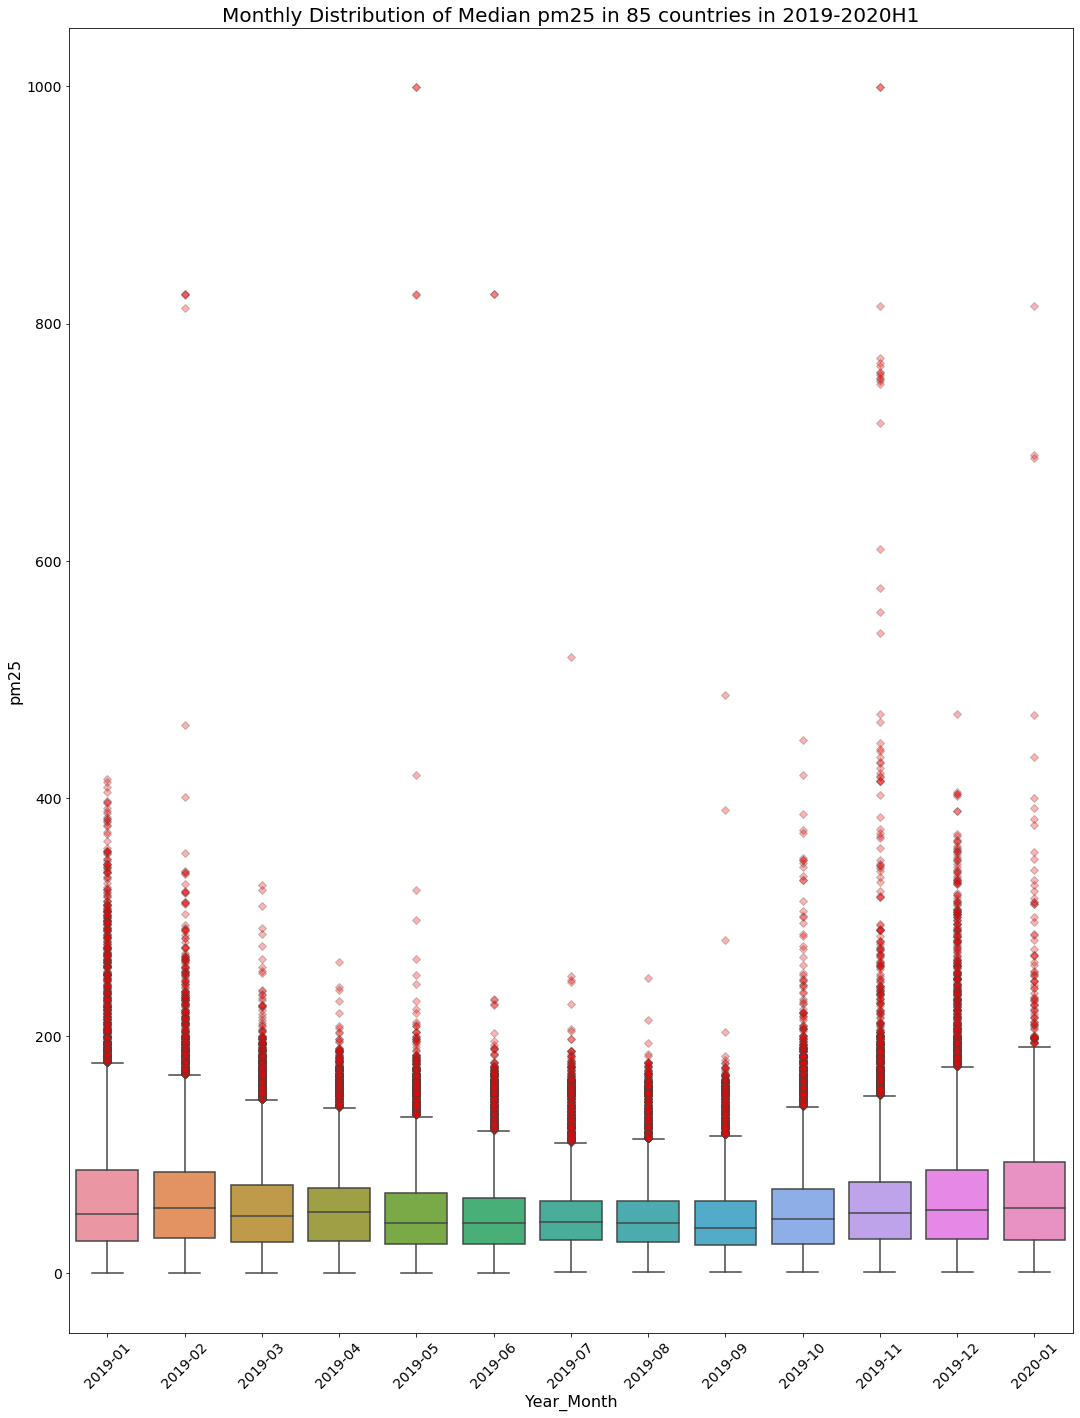

In [29]:
specie_boxplot("pm25")

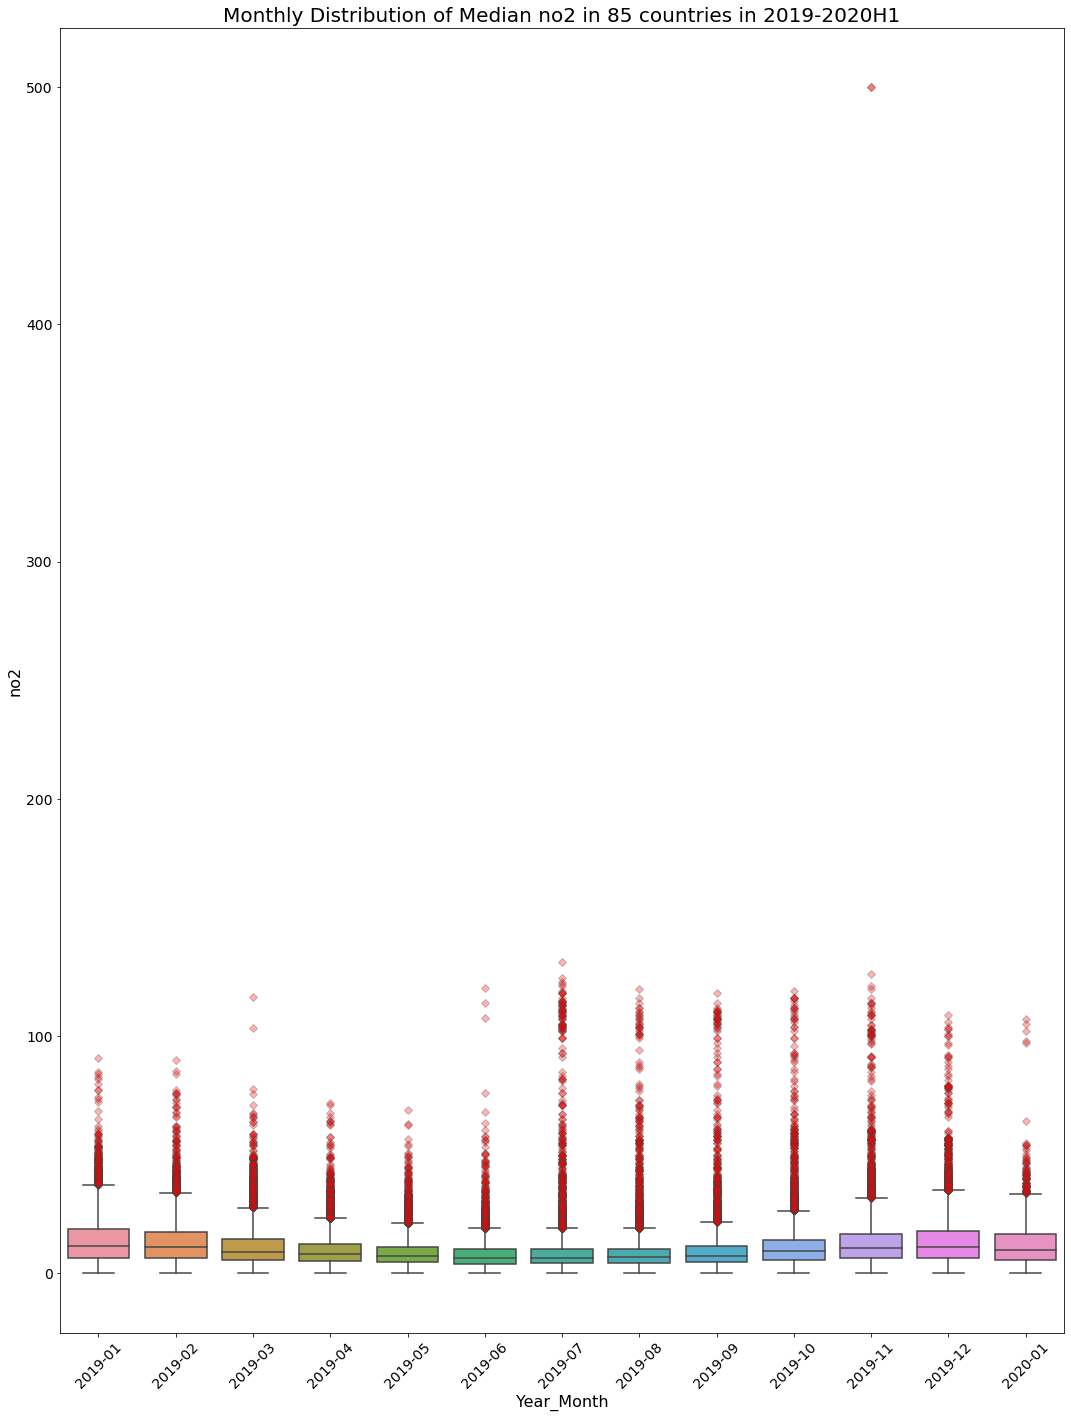

In [30]:
specie_boxplot("no2")

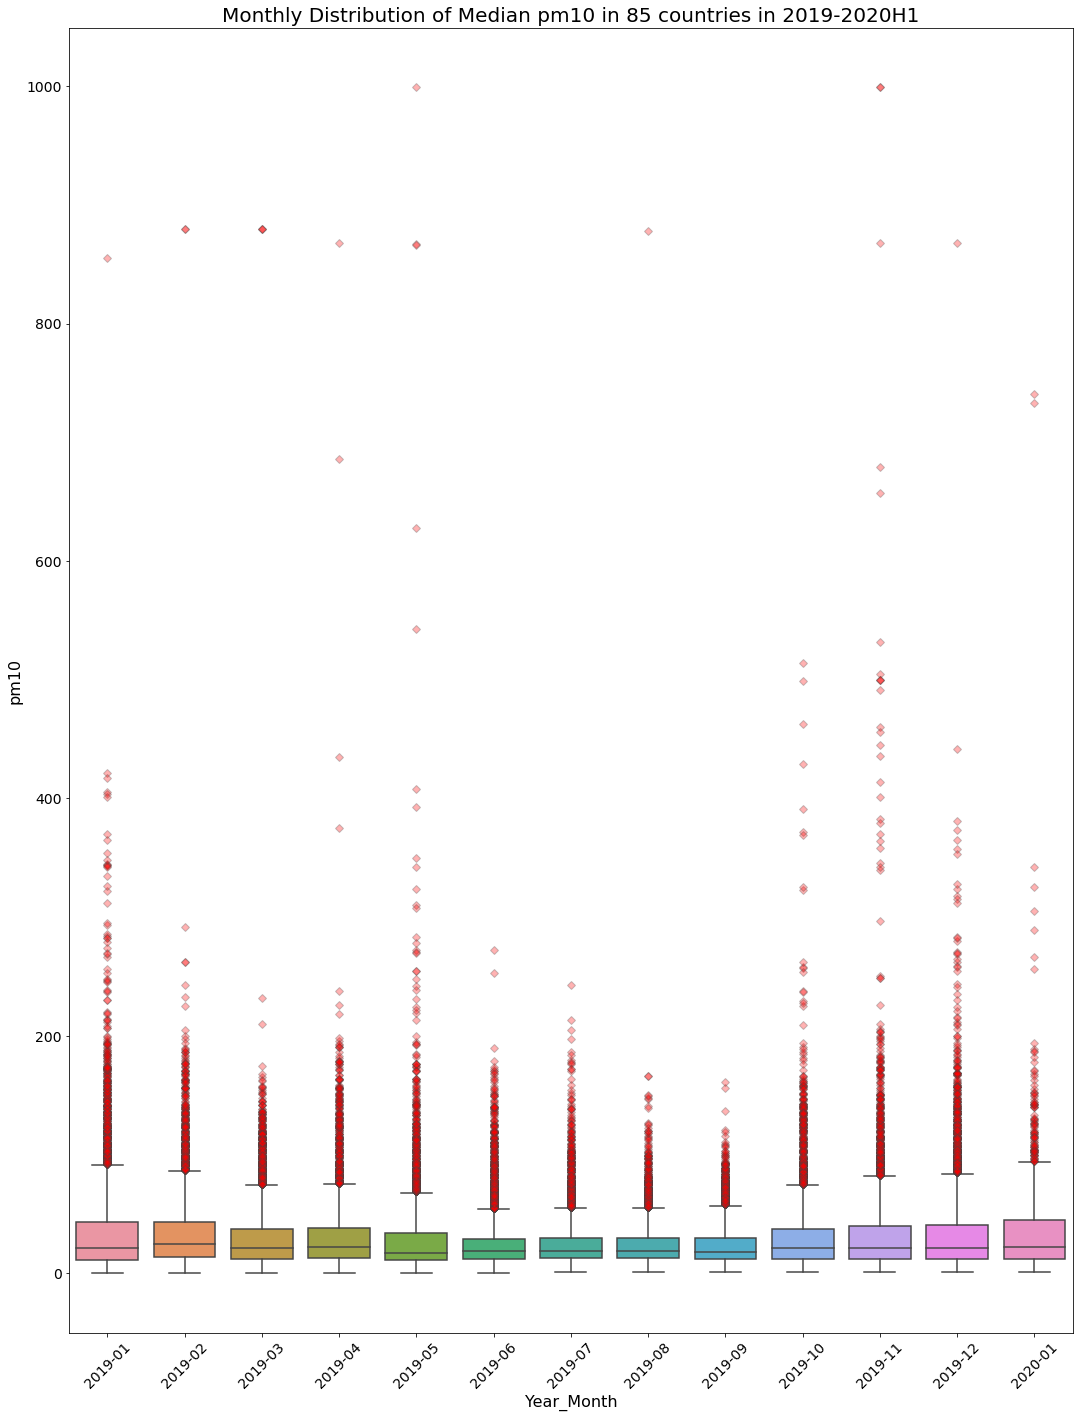

In [31]:
specie_boxplot("pm10")

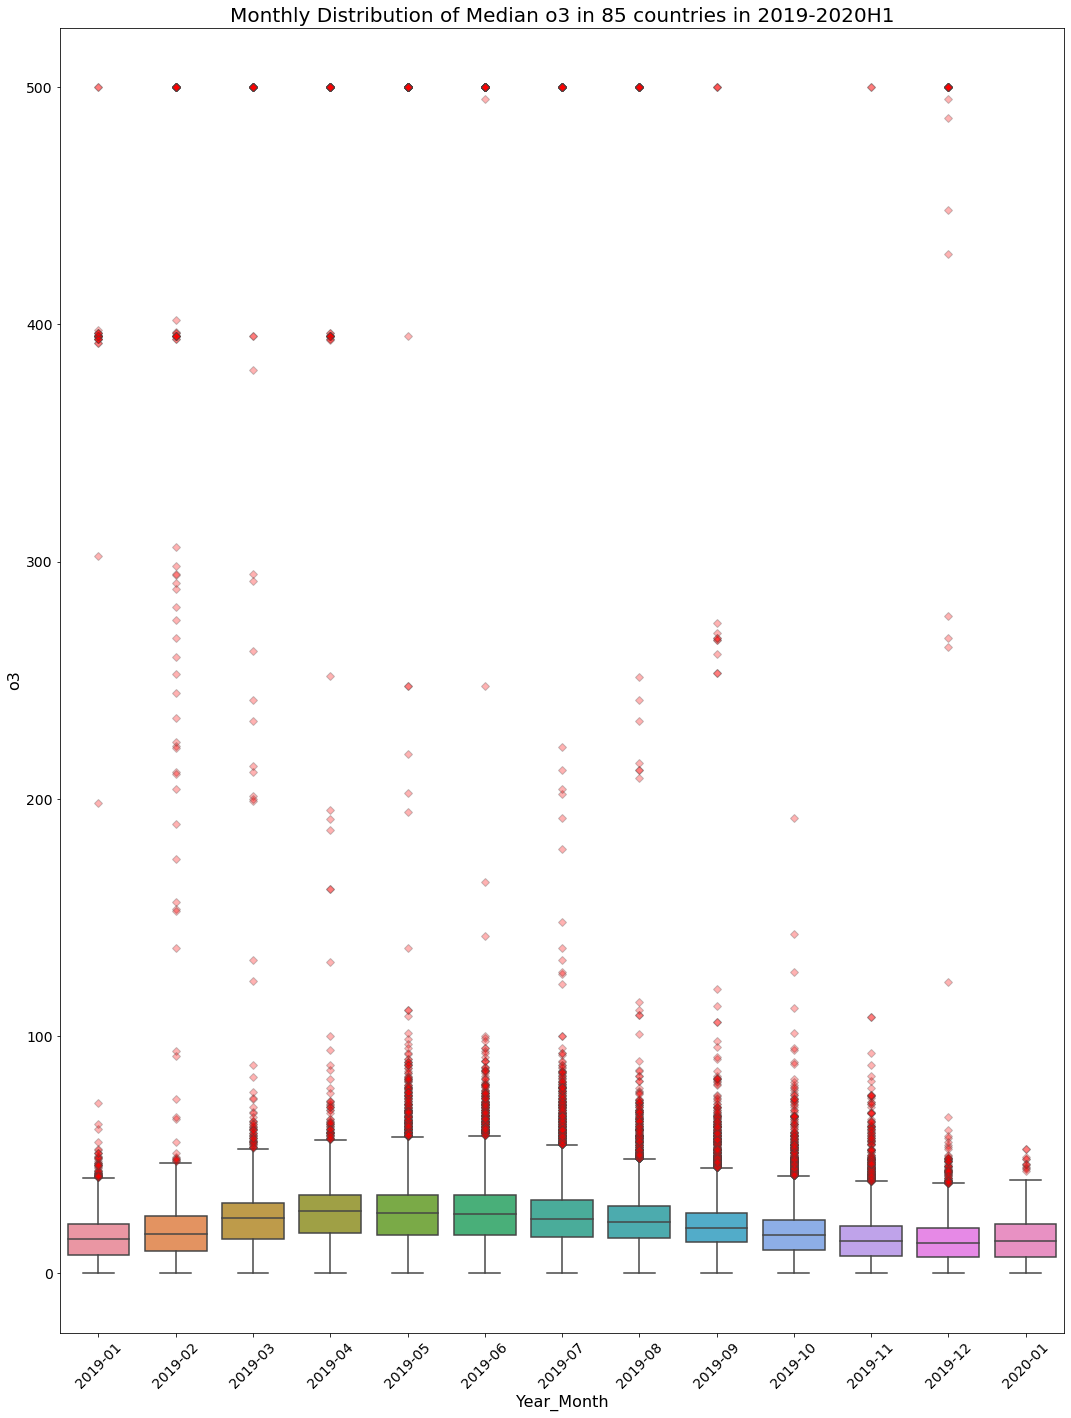

In [32]:
specie_boxplot("o3")

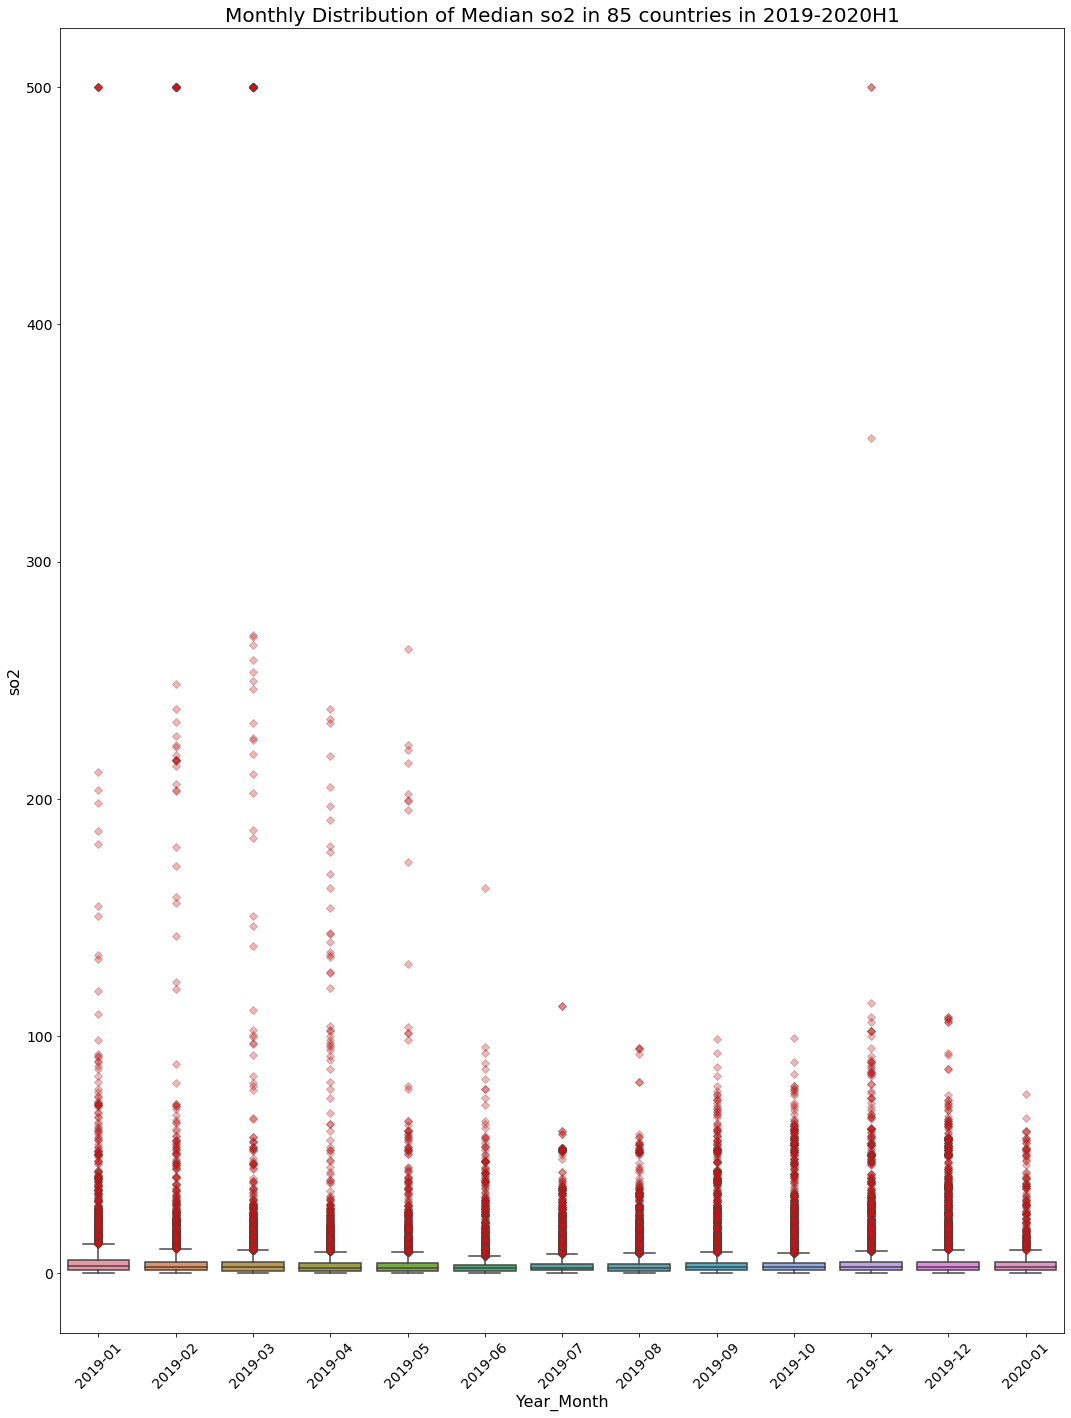

In [33]:
specie_boxplot("so2")

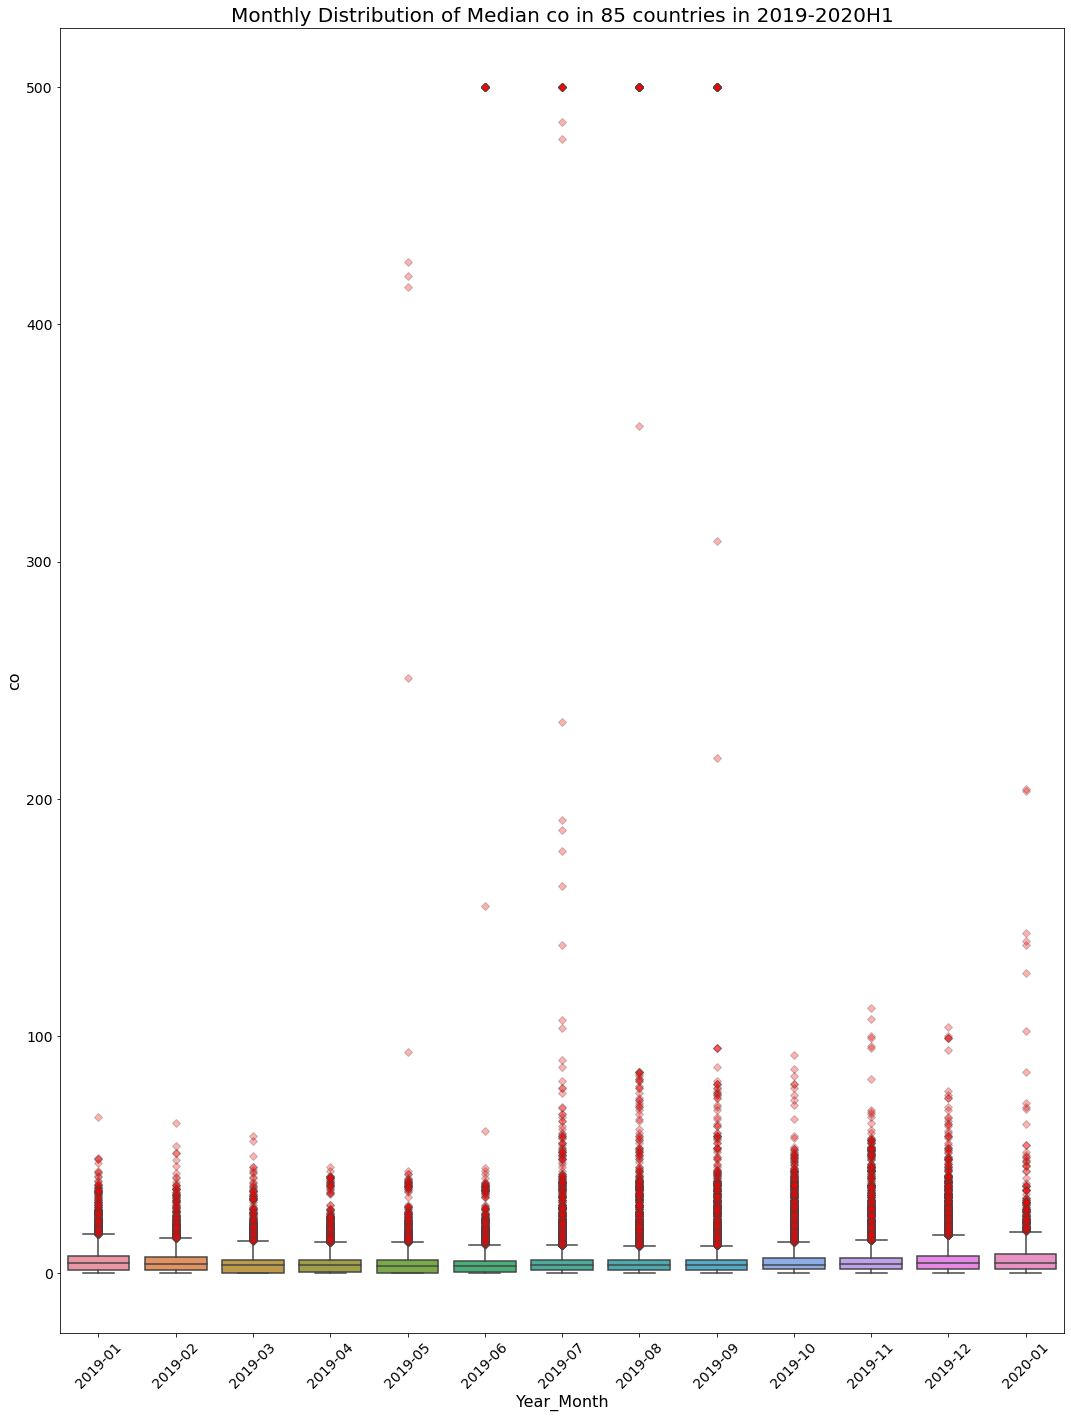

In [34]:
specie_boxplot("co")

# World COVID-19 Data Clean Up

In [513]:
# Use the following api to get the country name, country code and slug
country_url = "https://api.covid19api.com/countries"
country_covid_data = requests.get(country_url).json()
pprint(country_covid_data)

[{'Country': 'Brunei Darussalam', 'ISO2': 'BN', 'Slug': 'brunei'},
 {'Country': 'Cameroon', 'ISO2': 'CM', 'Slug': 'cameroon'},
 {'Country': 'Korea (South)', 'ISO2': 'KR', 'Slug': 'korea-south'},
 {'Country': 'Saint Pierre and Miquelon',
  'ISO2': 'PM',
  'Slug': 'saint-pierre-and-miquelon'},
 {'Country': 'Spain', 'ISO2': 'ES', 'Slug': 'spain'},
 {'Country': 'British Virgin Islands',
  'ISO2': 'VG',
  'Slug': 'british-virgin-islands'},
 {'Country': 'Finland', 'ISO2': 'FI', 'Slug': 'finland'},
 {'Country': 'Saudi Arabia', 'ISO2': 'SA', 'Slug': 'saudi-arabia'},
 {'Country': 'Bulgaria', 'ISO2': 'BG', 'Slug': 'bulgaria'},
 {'Country': 'Eritrea', 'ISO2': 'ER', 'Slug': 'eritrea'},
 {'Country': 'Greece', 'ISO2': 'GR', 'Slug': 'greece'},
 {'Country': 'Qatar', 'ISO2': 'QA', 'Slug': 'qatar'},
 {'Country': 'Turks and Caicos Islands',
  'ISO2': 'TC',
  'Slug': 'turks-and-caicos-islands'},
 {'Country': 'Nauru', 'ISO2': 'NR', 'Slug': 'nauru'},
 {'Country': 'US Minor Outlying Islands',
  'ISO2': 'UM',

In [514]:
# Create the country code dataframe
country_covid_df = pd.DataFrame(country_covid_data)
country_covid_df

,Country,Slug,ISO2
0,Brunei Darussalam,brunei,BN
1,Cameroon,cameroon,CM
2,Korea (South),korea-south,KR
3,Saint Pierre and Miquelon,saint-pierre-and-miquelon,PM
4,Spain,spain,ES
...,...,...,...
243,Faroe Islands,faroe-islands,FO
244,Mongolia,mongolia,MN
245,Niue,niue,NU
246,Swaziland,swaziland,SZ


In [515]:
# The country code is used to merge with the air quality data (with country code only)
final_air_df = pd.merge(clean_airdf, country_covid_df, how="inner",
                        left_on="Country", right_on="ISO2", suffixes=("_code", "_name"))
final_air_df.head(10)

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug,ISO2
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates,AE
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates,AE
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates,AE
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates,AE
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates,AE
5,2019-01-14,AE,Abu Dhabi,pm10,24,65.0,76.0,74.0,88.68,United Arab Emirates,united-arab-emirates,AE
6,2019-01-15,AE,Abu Dhabi,pm10,24,76.0,97.0,83.0,637.66,United Arab Emirates,united-arab-emirates,AE
7,2019-01-21,AE,Abu Dhabi,pm10,24,52.0,59.0,58.0,69.98,United Arab Emirates,united-arab-emirates,AE
8,2019-01-08,AE,Abu Dhabi,pm10,24,92.0,98.0,97.0,26.79,United Arab Emirates,united-arab-emirates,AE
9,2019-01-17,AE,Abu Dhabi,pm10,24,74.0,85.0,77.0,199.55,United Arab Emirates,united-arab-emirates,AE


In [516]:
# Delete the ISO2 which is identical to the country_code column
del final_air_df["ISO2"]
final_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates


In [517]:
final_air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984247 entries, 0 to 984246
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          984247 non-null  datetime64[ns]
 1   Country_code  984247 non-null  object        
 2   City          984247 non-null  object        
 3   Specie        984247 non-null  object        
 4   count         984247 non-null  int64         
 5   min           984247 non-null  float64       
 6   max           984247 non-null  float64       
 7   median        984247 non-null  float64       
 8   variance      984247 non-null  float64       
 9   Country_name  984247 non-null  object        
 10  Slug          984247 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 90.1+ MB


In [518]:
slug_list = final_air_df["Slug"].unique().tolist()
len(slug_list)

90

In [519]:
# Use the slug list to loop through the Covid-19 API by all case status for each country.
base_covid_url = "https://api.covid19api.com/total/country/"

country_list = list()
date_list = list()
active_list = list()
confirmed_list = list()
recovered_list = list()
deaths_list = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for slug in slug_list:

    try:
        response = requests.get(base_covid_url + slug).json()

        for element in response:
            country_list.append(element['Country'])
            date_list.append(element['Date'])
            active_list.append(element['Active'])
            confirmed_list.append(element['Confirmed'])
            recovered_list.append(element['Recovered'])
            deaths_list.append(element['Deaths'])

        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {slug}")

        if counter == 50:
            set_counter += 1
            counter = 0

    except KeyError:
        print("Country not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | united-arab-emirates
Processing Record 2 of Set 1 | czech-republic
Processing Record 3 of Set 1 | singapore
Processing Record 4 of Set 1 | austria
Processing Record 5 of Set 1 | belgium
Processing Record 6 of Set 1 | korea-south
Processing Record 7 of Set 1 | mongolia
Processing Record 8 of Set 1 | norway
Processing Record 9 of Set 1 | nepal
Processing Record 10 of Set 1 | peru
Processing Record 11 of Set 1 | bosnia-and-herzegovina
Processing Record 12 of Set 1 | brazil
Processing Record 13 of Set 1 | israel
Processing Record 14 of Set 1 | india
Processing Record 15 of Set 1 | iran
Processing Record 16 of Set 1 | new-zealand
Processing Record 17 of Set 1 | ukraine
Processing Record 18 of Set 1 | united-states
Processing Record 19 of Set 1 | france
Processing Record 20 of Set 1 | kuwait
Processing Record 21 of Set 1 | réunion
Processing Record 22 of Set 1 | turkey
Processing Record 23 of Set 1 | 

In [520]:
# Create the world covid dataframe
covid_df = pd.DataFrame({
    "Country": country_list,
    "Date": date_list,
    "Active cases": active_list,
    "Confirmed cases": confirmed_list,
    "Recovered cases": recovered_list,
    "Deaths": deaths_list
})
covid_df.head()

,Country,Date,Active cases,Confirmed cases,Recovered cases,Deaths
0,United Arab Emirates,2020-01-22T00:00:00Z,0,0,0,0
1,United Arab Emirates,2020-01-23T00:00:00Z,0,0,0,0
2,United Arab Emirates,2020-01-24T00:00:00Z,0,0,0,0
3,United Arab Emirates,2020-01-25T00:00:00Z,0,0,0,0
4,United Arab Emirates,2020-01-26T00:00:00Z,0,0,0,0


In [521]:
# Overview of the covid dataframe
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          44285 non-null  object
 1   Date             44285 non-null  object
 2   Active cases     44285 non-null  int64 
 3   Confirmed cases  44285 non-null  int64 
 4   Recovered cases  44285 non-null  int64 
 5   Deaths           44285 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ MB


In [522]:
# Convert the Date column to datetime format
covid_df['Date'] = covid_df['Date'].astype('datetime64[ns]')

In [523]:
# Find the earliest date the covid dataset covers:
covid_df["Date"].min()

Timestamp('2020-01-22 00:00:00')

In [524]:
# Find the latest date the covid dataset covers:
covid_df["Date"].max()

Timestamp('2021-06-25 00:00:00')

In [525]:
# Set cutoff date to the 1st July 2020
world_covid_df = covid_df[covid_df["Date"] <= end_date]

In [526]:
# Overview of world_covid_df after setting cutoff date
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          44285 non-null  object        
 1   Date             44285 non-null  datetime64[ns]
 2   Active cases     44285 non-null  int64         
 3   Confirmed cases  44285 non-null  int64         
 4   Recovered cases  44285 non-null  int64         
 5   Deaths           44285 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [527]:
# Check the number of unique countries in the world_covid_df
covid_df["Country"].nunique()

85

In [528]:
# Export the list of countries that are shared by the air data and world covid data
air_covid_common_country_list = covid_df["Country"].unique().tolist()
air_covid_common_country_list

['United Arab Emirates',
 'Czech Republic',
 'Singapore',
 'Austria',
 'Belgium',
 'Korea (South)',
 'Mongolia',
 'Norway',
 'Nepal',
 'Peru',
 'Bosnia and Herzegovina',
 'Brazil',
 'Israel',
 'India',
 'Iran, Islamic Republic of',
 'New Zealand',
 'Ukraine',
 'United States of America',
 'France',
 'Kuwait',
 'Turkey',
 'Republic of Kosovo',
 'Uzbekistan',
 'Finland',
 'Japan',
 'Kazakhstan',
 'Romania',
 'Russian Federation',
 'Slovakia',
 'Spain',
 'Croatia',
 'Thailand',
 'Sri Lanka',
 'Argentina',
 'Canada',
 'Switzerland',
 'Chile',
 'Ethiopia',
 'Kyrgyzstan',
 'Germany',
 'Mexico',
 'Saudi Arabia',
 'Uganda',
 'Bangladesh',
 'Hungary',
 'Iceland',
 'Philippines',
 'Indonesia',
 'Sweden',
 'El Salvador',
 'Viet Nam',
 'Australia',
 'Bahrain',
 'United Kingdom',
 'Ireland',
 'Lao PDR',
 'Lithuania',
 'Portugal',
 'Taiwan, Republic of China',
 'China',
 'Poland',
 'Bulgaria',
 'Cyprus',
 'Iraq',
 'Macedonia, Republic of',
 'Bolivia',
 'Denmark',
 'Ecuador',
 'South Africa',
 'Colom

In [529]:
# Filter out the air quality data to contain only the above countries
final_clean_air_df = final_air_df[final_air_df["Country_name"].isin(
    air_covid_common_country_list)]
final_clean_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name,Slug
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates,united-arab-emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates,united-arab-emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates,united-arab-emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates,united-arab-emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates,united-arab-emirates


In [530]:
# Double check the number of countries in the final clean air data
final_clean_air_df["Country_name"].nunique()

85

In [531]:
del final_clean_air_df["Slug"]
final_clean_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates


In [532]:
# Export the air data to csv file for future use
final_clean_air_df.to_csv("output_csv/clean_world_air.csv", index=False)

# Visualise World Covid-19 Active Cases

In [533]:
covid_df.tail()

,Country,Date,Active cases,Confirmed cases,Recovered cases,Deaths
44280,Costa Rica,2021-06-21,71340,354095,278225,4530
44281,Costa Rica,2021-06-22,70032,355620,281042,4546
44282,Costa Rica,2021-06-23,69021,357523,283935,4567
44283,Costa Rica,2021-06-24,69329,359266,285356,4581
44284,Costa Rica,2021-06-25,69155,361005,287248,4602


In [534]:
# Filter out the world covid data with active cases
world_active_covid = covid_df[[
    "Date", "Country", "Active cases"]].sort_values("Date").copy()
world_active_covid.head()

,Date,Country,Active cases
0,2020-01-22,United Arab Emirates,0
21361,2020-01-22,Saudi Arabia,0
22924,2020-01-22,Hungary,0
5731,2020-01-22,Brazil,0
7815,2020-01-22,New Zealand,0


In [535]:
# Get the world covid active case data on the 1st July 2020
july1_world_active_covid = world_active_covid[world_active_covid["Date"]
                                              == "2020-07-01"].copy()

In [536]:
# Check the number of countries covered in the world covid active case data on the 1st July 2020
july1_world_active_covid["Country"].nunique()

85

In [537]:
# Visualise the 85 countries covered in our analysis in an interactive choropleth map

figure = px.choropleth(july1_world_active_covid, locations="Country", locationmode="country names", color="Active cases", hover_name="Country",
                       color_continuous_scale="ylorrd", range_color=[1, 700000], title="85 Countries with Number of Covid-19 Active Cases On 1st July 2020")
figure.show()

In [538]:
# Transpose the 85 countries to columns
world_active_covid_transposed = world_active_covid.pivot_table(
    index="Date", columns="Country", values="Active cases")
world_active_covid_transposed.head()

Country,Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,Bolivia,Bosnia and Herzegovina,...,Tajikistan,Thailand,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uzbekistan,Viet Nam
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,2
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,2,0,2
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,2,0,2
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,2,0,0,0,0,0,5,0,2


In [539]:
# Calculate the total active cases for the 85 countries on each Date
world_active_covid_transposed["Total active cases"] = world_active_covid_transposed.sum(axis=1)
world_active_covid_transposed.head()

Country,Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,Bolivia,Bosnia and Herzegovina,...,Thailand,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uzbekistan,Viet Nam,Total active cases
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,510
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,2,605
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,2,0,2,876
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,2,0,2,1346
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,2,0,0,0,0,0,5,0,2,2002


In [540]:
# Get and export the covid Total active case data for the 85 countries
total_active_world_covid = world_active_covid_transposed["Total active cases"].to_frame().reset_index()
total_active_world_covid.head()

,Date,Total active cases
0,2020-01-22,510
1,2020-01-23,605
2,2020-01-24,876
3,2020-01-25,1346
4,2020-01-26,2002


In [541]:
total_active_world_covid.to_csv("output_csv/active_world_covid.csv", index=False)

In [617]:
# Get and export the covid active case data for Australia
au_covid = world_active_covid[world_active_covid["Country"] == "Australia"].copy()
au_covid.head()

,Date,Country,Active cases
26571,2020-01-22,Australia,0
26572,2020-01-23,Australia,0
26573,2020-01-24,Australia,0
26574,2020-01-25,Australia,0
26575,2020-01-26,Australia,4


In [618]:
au_covid.to_csv("output_csv/active_au_covid.csv", index=False)

# Import the air quality and covid data files

In [542]:
# Import the air data for the 85 countries
world_air = pd.read_csv("output_csv/clean_world_air.csv", parse_dates=True)
world_air.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,United Arab Emirates
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,United Arab Emirates
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,United Arab Emirates
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,United Arab Emirates
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,United Arab Emirates


In [543]:
# Check the data types and any missing values
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977319 entries, 0 to 977318
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          977319 non-null  object 
 1   Country_code  977319 non-null  object 
 2   City          977319 non-null  object 
 3   Specie        977319 non-null  object 
 4   count         977319 non-null  int64  
 5   min           977319 non-null  float64
 6   max           977319 non-null  float64
 7   median        977319 non-null  float64
 8   variance      977319 non-null  float64
 9   Country_name  977319 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 74.6+ MB


In [544]:
# Change the data type of the Date column into datetime
world_air['Date'] = world_air['Date'].astype('datetime64[ns]')

In [545]:
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977319 entries, 0 to 977318
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          977319 non-null  datetime64[ns]
 1   Country_code  977319 non-null  object        
 2   City          977319 non-null  object        
 3   Specie        977319 non-null  object        
 4   count         977319 non-null  int64         
 5   min           977319 non-null  float64       
 6   max           977319 non-null  float64       
 7   median        977319 non-null  float64       
 8   variance      977319 non-null  float64       
 9   Country_name  977319 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 74.6+ MB


In [548]:
# Import the covid data total active cases for the 85 countries 
active_world_covid = pd.read_csv("output_csv/active_world_covid.csv", parse_dates=True)
active_world_covid.head()

,Date,Total active cases
0,2020-01-22,510
1,2020-01-23,605
2,2020-01-24,876
3,2020-01-25,1346
4,2020-01-26,2002


In [549]:
# Check the data types and any missing values
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                521 non-null    object
 1   Total active cases  521 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB


In [550]:
# Change the data type of the Date column into datetime
active_world_covid['Date'] = active_world_covid['Date'].astype('datetime64[ns]')

In [551]:
# Double check the data types
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                521 non-null    datetime64[ns]
 1   Total active cases  521 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


In [579]:
# Import the covid active case data for Australia
active_au_covid = pd.read_csv("output_csv/active_au_covid.csv", parse_dates=True)
active_au_covid.head()

,Date,Country,Active cases
0,2020-01-22,Australia,0
1,2020-01-23,Australia,0
2,2020-01-24,Australia,0
3,2020-01-25,Australia,0
4,2020-01-26,Australia,4


In [580]:
# Check data types of the covid active case data for Australia
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          521 non-null    object
 1   Country       521 non-null    object
 2   Active cases  521 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


In [581]:
# Change the data type of the Date column into datetime
active_au_covid['Date'] = active_au_covid['Date'].astype('datetime64[ns]')

In [582]:
# Double check the data types for the covid active case data for Australia
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          521 non-null    datetime64[ns]
 1   Country       521 non-null    object        
 2   Active cases  521 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.3+ KB


In [599]:
# Filter the air data for Australia
au_air_df = world_air[world_air["Country_code"]=="AU"].copy()
au_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
656925,2019-01-25,AU,Sydney,co,21,3.4,4.5,3.4,2.59,Australia
656926,2019-02-19,AU,Sydney,co,27,1.2,3.4,1.2,8.38,Australia
656927,2019-02-24,AU,Sydney,co,9,1.2,1.2,1.2,0.00,Australia
656928,2019-03-03,AU,Sydney,co,33,1.2,2.3,1.2,2.89,Australia
656929,2019-01-03,AU,Sydney,co,9,1.2,3.4,3.4,12.10,Australia


In [602]:
# Filter out the clean_airdf part of Melbourne
mel_air_df = clean_airdf.loc[(clean_airdf["Country"] == "AU") & (
    clean_airdf["City"] == "Melbourne")].sort_values("Date").set_index("Date")
mel_air_df.head()

,Country,City,Specie,count,min,max,median,variance
Date,,,,,,,,
2019-01-01,AU,Melbourne,pm25,161,1.0,53.0,27.0,1398.93
2019-01-01,AU,Melbourne,co,18,1.2,2.3,1.2,3.20
2019-01-01,AU,Melbourne,pm10,124,2.0,49.0,14.0,566.48
2019-01-01,AU,Melbourne,no2,117,1.0,12.1,2.8,81.70
2019-01-01,AU,Melbourne,so2,39,1.5,45.8,1.5,1406.58


In [603]:
# Overview of the air pollutants appearing in the Melbourne air quality data
mel_air_df["Specie"].value_counts()

pm10    376
o3      376
pm25    375
no2     373
co      360
so2     312
Name: Specie, dtype: int64

In [604]:
# Define a function plotting air pollutant changes in Melbourne using the rolling windows
# Rolling windows overlap and "roll" along at the same frequency as the data.
# Therefore, the transformed time series is at the same frequency as the original ones.


def mel_air_specie(specie):
    specie_mel_air = mel_air_df[mel_air_df["Specie"] == specie]
    rolling_median_specie_mel_air = specie_mel_air["median"].rolling(
        30, center=True).mean()
    rolling_median_specie_mel_air.plot(figsize=(12, 5))

    plt.xlabel("Year_Month", fontsize=12)
    plt.xlim(starting_date, end_date)
    plt.axvspan("2020-03", "2020-07", color='red', alpha=0.1)
    plt.axvspan("2019-03", "2019-07", color='dodgerblue', alpha=0.1)

    plt.ylabel(specie, fontsize=12)
    plt.title(
        f"30-day Moving Average of Median {specie} values in Melbourne in 2019-2020H1", fontsize=14)

    plt.savefig(f"images/melbourne_{specie}.png")

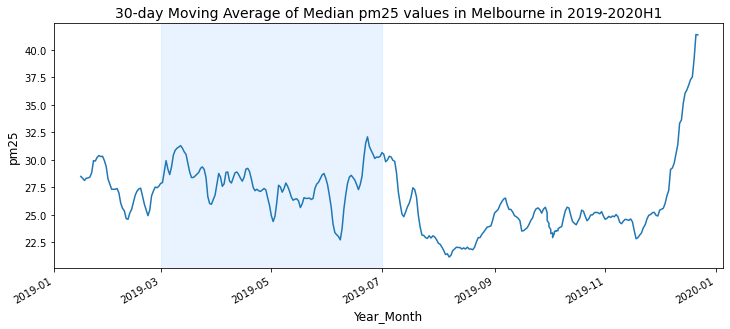

In [605]:
mel_air_specie("pm25")

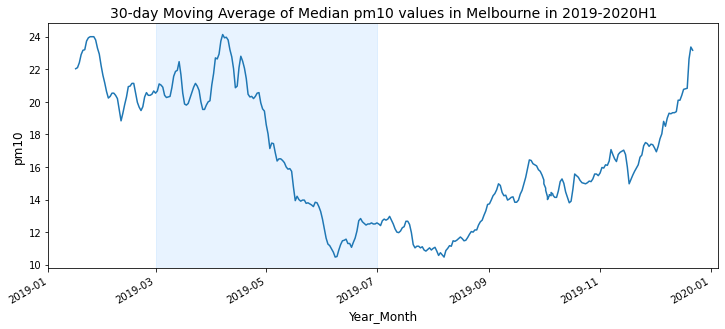

In [606]:
mel_air_specie("pm10")

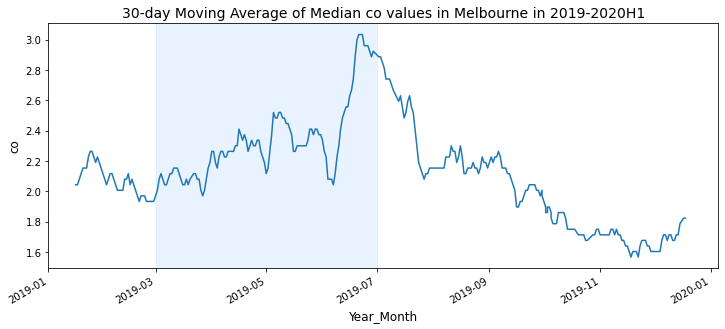

In [607]:
mel_air_specie("co")

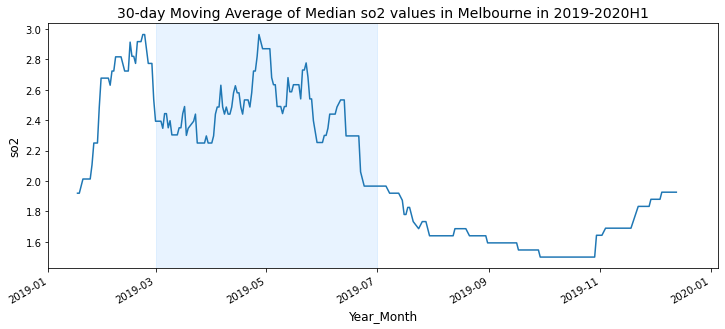

In [608]:
mel_air_specie("so2")

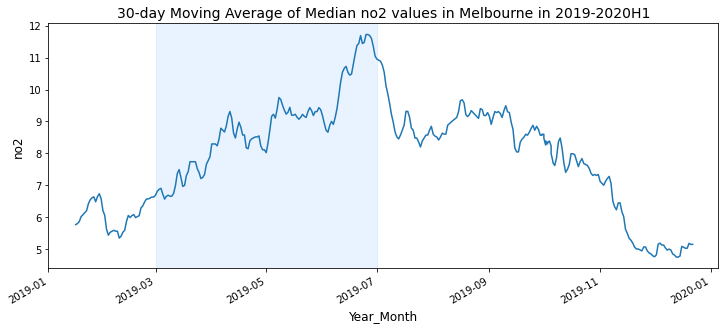

In [609]:
mel_air_specie("no2")

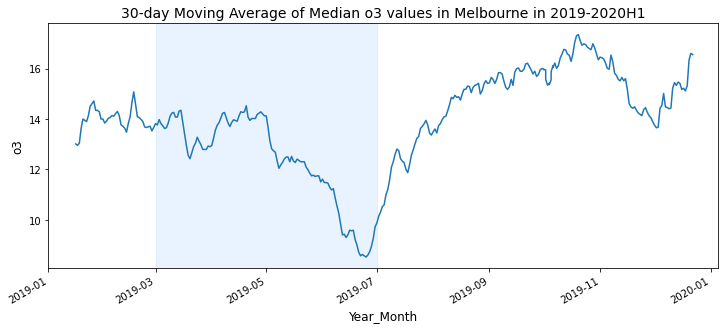

In [610]:
mel_air_specie("o3")

In [37]:
# Define a function plotting air pollutant changes in different cities using the rolling windows


def specie_cities(df, city_list, specie):

    specie_cities_df = df[(df["City"].isin(city_list)) & (
        df["Specie"] == specie)].sort_values("Date").copy()
    specie_cities_transposed_df = specie_cities_df.pivot_table(
        index="Date", columns="City", values="median")
    rolling_specie_cities = specie_cities_transposed_df[city_list].rolling(
        7, center=True).mean()

    plt.style.use('seaborn-bright')
    rolling_specie_cities.plot(figsize=(12, 5))

    plt.xlabel("Year_Month", fontsize=12)
    plt.xlim(starting_date, end_date)
    plt.axvspan("2020-03", "2020-07", color='red', alpha=0.1)
    plt.axvspan("2019-03", "2019-07", color='dodgerblue', alpha=0.1)

    plt.ylabel(specie, fontsize=12)
    plt.title(
        f"7 day Moving Average of median {specie} in {city_list} in 2019-2020H1", fontsize=14)
    plt.savefig(f"images/{city_list}_{specie}.png")

In [38]:
# Filter out air quality data for Australia

au_air_df = clean_airdf.loc[clean_airdf["Country"] == "AU"]
au_air_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
1801279,2019-01-25,AU,Sydney,co,21,3.4,4.5,3.4,2.59
1801280,2019-02-19,AU,Sydney,co,27,1.2,3.4,1.2,8.38
1801281,2019-02-24,AU,Sydney,co,9,1.2,1.2,1.2,0.00
1801282,2019-03-03,AU,Sydney,co,33,1.2,2.3,1.2,2.89
1801283,2019-01-03,AU,Sydney,co,9,1.2,3.4,3.4,12.10


In [39]:
au_cities_list = ["Sydney", "Melbourne"]

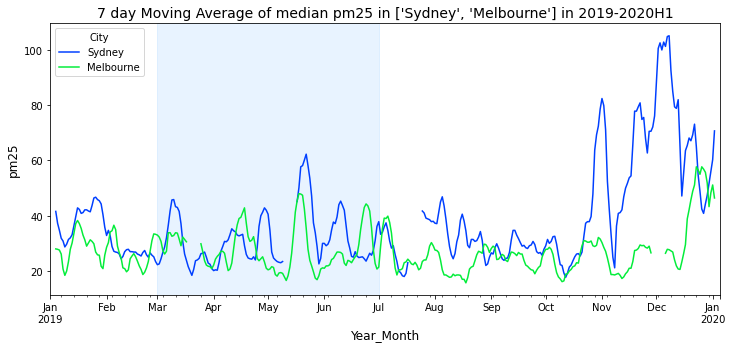

In [40]:
specie_cities(df=au_air_df, city_list=au_cities_list, specie="pm25")

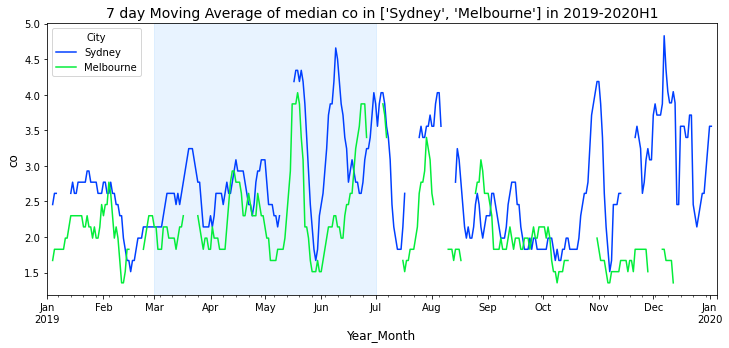

In [41]:
specie_cities(df=au_air_df, city_list=au_cities_list, specie="co")

# Chao

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import datetime
from pprint import pprint
import plotly.express as px

In [2]:
parent_folder = 'historical_data'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

In [3]:
master_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [4]:
# Display an overview of the Specie column
master_df["Specie"].unique()

array(['co', 'pm10', 'o3', 'so2', 'no2', 'pm25', 'psi', 'uvi', 'neph',
       'aqi', 'mepaqi', 'pol', 'temperature', 'humidity', 'pressure',
       'wd', 'wind-speed', 'd', 'pm1', 'wind-gust', 'precipitation',
       'dew', 'wind speed', 'wind gust'], dtype=object)

In [5]:
# Display an overview of the number of rows each Specie has in the dataframe
master_df["Specie"].value_counts()

no2              757103
pm25             751747
pm10             739799
o3               719427
so2              630605
co               577117
temperature      563323
humidity         563167
pressure         560354
wind-speed       508685
dew              407564
wind-gust        312681
precipitation     55443
wind speed        49751
wd                47936
wind gust         31765
aqi               25188
uvi               17841
pol                4958
pm1                2973
neph               2321
d                  2031
mepaqi             1690
psi                 363
Name: Specie, dtype: int64

In [6]:
species_to_remove = ["temperature", "humidity", "pressure", "wind-speed", "dew", "wind-gust",
                     "wind speed", "wind gust", "precipitation", "wd", "aqi", "uvi", "pol", "pm1", "mepaqi", "neph"]

short_airdf = master_df[~master_df["Specie"].isin(species_to_remove)].reset_index(drop=True).copy()

In [7]:
short_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [8]:
# Overview of the remaining air pollutant species in focus
short_airdf["Specie"].value_counts()

no2     757103
pm25    751747
pm10    739799
o3      719427
so2     630605
co      577117
d         2031
psi        363
Name: Specie, dtype: int64

In [9]:
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178192 entries, 0 to 4178191
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date      object 
 1   Country   object 
 2   City      object 
 3   Specie    object 
 4   count     int64  
 5   min       float64
 6   max       float64
 7   median    float64
 8   variance  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 286.9+ MB


In [10]:
short_airdf["Date"] = pd.to_datetime(short_airdf["Date"],infer_datetime_format=True)

In [11]:
# Double check the Date data type
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178192 entries, 0 to 4178191
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 286.9+ MB


In [12]:
# Find the earliest date the air quality dataset covers:
short_airdf["Date"].min()

Timestamp('2014-12-29 00:00:00')

In [13]:
# Find the latest date the air quality dataset covers:
short_airdf["Date"].max()

Timestamp('2021-12-06 00:00:00')

In [14]:
# Because we only focus on air data from 2019 to 2020H1, we'll remove the few data points on 2018-12-31 and the first days of July 2020.
clean_airdf = short_airdf[(short_airdf["Date"] >= pd.to_datetime("2019-01-01")) & (short_airdf["Date"] <= pd.to_datetime("2020-07-01"))].copy()
clean_airdf

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-07-01,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-10-01,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97
...,...,...,...,...,...,...,...,...,...
3913826,2020-06-29,SK,Bratislava,pm25,70,5.0,107.0,38.0,4019.33
3913829,2020-07-01,SK,Bratislava,pm25,96,5.0,104.0,55.0,6569.41
3913837,2020-07-01,SK,Bratislava,no2,93,1.0,27.9,6.0,502.39
3913853,2020-06-30,SK,Bratislava,no2,95,1.4,24.3,6.4,495.58


In [15]:
# Set the starting date for the air quality analysis
starting_date = clean_airdf["Date"].min()
starting_date

Timestamp('2019-01-01 00:00:00')

In [16]:
# Set the cutoff date for the air quality analysis
end_date = clean_airdf["Date"].max()
end_date

Timestamp('2020-07-01 00:00:00')

In [17]:
# Display an overview of the Country column
clean_airdf["Country"].unique()

array(['AE', 'CZ', 'SG', 'AT', 'BE', 'KR', 'MN', 'NO', 'NP', 'PE', 'BA',
       'BR', 'IL', 'IN', 'IR', 'NZ', 'UA', 'US', 'FR', 'KW', 'RE', 'TR',
       'XK', 'UZ', 'FI', 'JP', 'KZ', 'RO', 'RU', 'SK', 'ES', 'HK', 'HR',
       'TH', 'LK', 'AR', 'CA', 'CH', 'CL', 'ET', 'KG', 'CW', 'DE', 'MX',
       'SA', 'UG', 'BD', 'HU', 'IS', 'PH', 'ID', 'MO', 'SE', 'SV', 'VN',
       'AU', 'BH', 'GB', 'IE', 'LA', 'LT', 'PR', 'PT', 'TW', 'CN', 'PL',
       'BG', 'CY', 'IQ', 'MK', 'BO', 'DK', 'EC', 'ZA', 'CO', 'EE', 'IT',
       'JO', 'NL', 'RS', 'PK', 'TJ', 'MM', 'DZ', 'TM', 'AF', 'GR', 'ML',
       'GE', 'GT', 'CR', 'GN', 'CI', 'GH'], dtype=object)

In [18]:
clean_airdf["Country"].nunique()

94

In [19]:
# Display an overview of the City column
clean_airdf["City"].unique()

array(['Abu Dhabi', 'Dubai', 'Prague', 'Ostrava', 'Brno', 'Pilsen',
       'Olomouc', 'Singapore', 'Salzburg', 'Linz', 'Innsbruck', 'Vienna',
       'Graz', 'Liège', 'Brussels', 'Charleroi', 'Gent', 'Namur',
       'Antwerpen', 'Jeonju', 'Seoul', 'Busan', 'Sejong', 'Ulsan',
       'Yeosu', 'Gwangju', 'Seongnam-si', 'Daejeon', 'Pohang', 'Changwon',
       'Suwon', 'Cheongju-si', 'Chuncheon', 'Daegu', 'Jeju City',
       'Incheon', 'Suncheon', 'Mokpo', 'Andong', 'Ulan Bator',
       'Trondheim', 'Oslo', 'Stavanger', 'Bergen', 'Kathmandu', 'Pokhara',
       'Lima', 'Sarajevo', 'Zenica', 'Tuzla', 'São José dos Campos',
       'São Paulo', 'Tel Aviv', 'Haifa', 'Jerusalem', 'Ashdod', 'Netanya',
       'Ashkelon', 'Petaẖ Tiqwa', 'New Delhi', 'Hyderabad', 'Delhi',
       'Chandigarh', 'Bhopal', 'Lucknow', 'Ghāziābād', 'Hāpur',
       'Gandhinagar', 'Chennai', 'Nashik', 'Visakhapatnam', 'Mumbai',
       'Jaipur', 'Patna', 'Muzaffarnagar', 'Thiruvananthapuram',
       'Bengaluru', 'Kolkata', 'Is

In [20]:
clean_airdf["City"].nunique()

602

In [21]:
clean_airdf.loc[clean_airdf["Country"] == "AU", "City"].value_counts()

Sydney        3405
Brisbane      3390
Melbourne     3326
Wollongong    3293
Darwin        3250
Adelaide      3158
Perth         3120
Newcastle     2897
Launceston    1138
Hobart        1138
Canberra      1131
Name: City, dtype: int64

In [22]:
 # #compare 5 cities Pairs, Brooklyn, Wu Han, Melbourne, New Delhi

In [23]:
#import data 2021 first half

a19_df = short_airdf[(short_airdf["Date"] >= "2019-01-01") & (short_airdf["Date"] <= "2019-12-31")].copy()
a20_df = short_airdf[(short_airdf["Date"] >= "2020-01-01") & (short_airdf["Date"] <= "2020-12-31")].copy()

In [24]:
paris19_df=a19_df[(a19_df['City']=='Paris')]
wuhan19_df=a19_df[(a19_df['City']=='Wuhan')]
brooklyn19_df=a19_df[(a19_df['City']=='Brooklyn')]
melbourne19_df=a19_df[(a19_df['City']=='Melbourne')]
newdelhi19_df=a19_df[(a19_df['City']=='New Delhi')]


paris20_df=a20_df[(a20_df['City']=='Paris')]
wuhan20_df=a20_df[(a20_df['City']=='Wuhan')]
brooklyn20_df=a20_df[(a20_df['City']=='Brooklyn')]
melbourne20_df=a20_df[(a20_df['City']=='Melbourne')]
newdelhi20_df=a20_df[(a20_df['City']=='New Delhi')]

In [25]:
# new delhi comparison
pm25d_19=newdelhi19_df[newdelhi19_df['Specie']=='pm25'].sort_values(by='Date')
pm25d_20=newdelhi20_df[newdelhi20_df['Specie']=='pm25'].sort_values(by='Date')

no2d_19=newdelhi19_df[newdelhi19_df['Specie']=='no2'].sort_values(by='Date')
no2d_20=newdelhi20_df[newdelhi20_df['Specie']=='no2'].sort_values(by='Date')

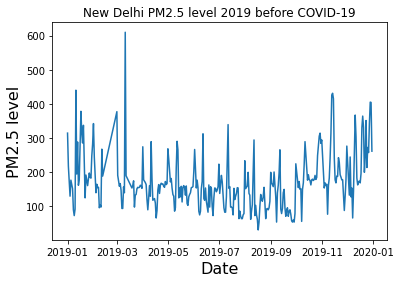

In [26]:
# pm25 2019

plt.plot(pm25d_19['Date'],pm25d_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('New Delhi PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/Newdelhipm25_2019.png")

In [27]:
# no2 2019

# no data for new delhi

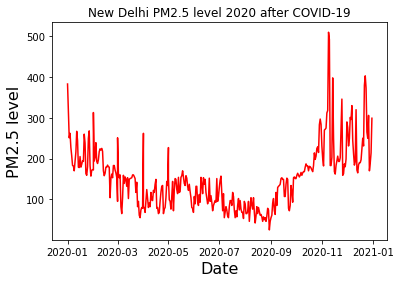

In [28]:
# pm25 2020
plt.plot(pm25d_20['Date'],pm25d_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('New Delhi PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/newdelhipm25_2020.png")

In [29]:
# paris comparison
pm25p_19=paris19_df[paris19_df['Specie']=='pm25'].sort_values(by='Date')
pm25p_20=paris20_df[paris20_df['Specie']=='pm25'].sort_values(by='Date')

no2p_19=paris19_df[paris19_df['Specie']=='no2'].sort_values(by='Date')
no2p_20=paris20_df[paris20_df['Specie']=='no2'].sort_values(by='Date')

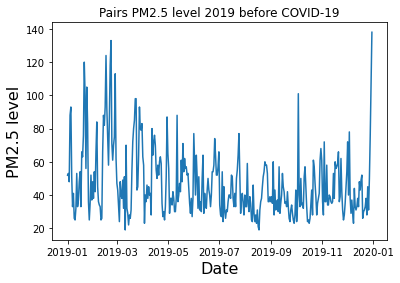

In [30]:
# pm25 2019

plt.plot(pm25p_19['Date'],pm25p_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Pairs PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/parispm252019.png")

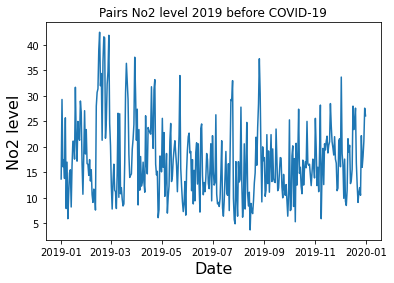

In [31]:
# no2 2019

plt.plot(no2p_19['Date'],no2p_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Pairs No2 level 2019 before COVID-19')
plt.savefig(f"images/parisno2_2019.png")

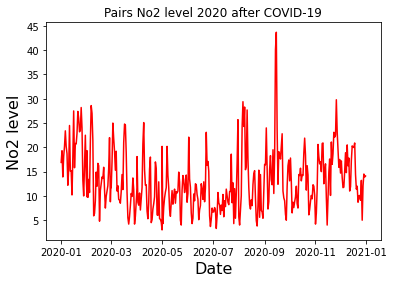

In [32]:
# no2 2020

plt.plot(no2p_20['Date'],no2p_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Pairs No2 level 2020 after COVID-19')
plt.savefig(f"images/parisno2_2020.png")

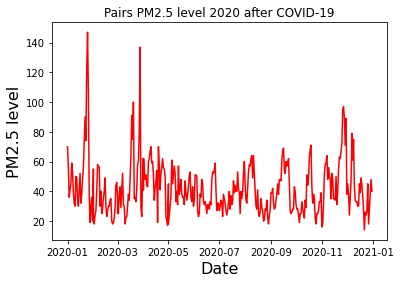

In [33]:
# pm25 2020
plt.plot(pm25p_20['Date'],pm25p_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Pairs PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/parispm25_2020.png")

In [34]:
# wuhan comparison
pm25w_19=wuhan19_df[wuhan19_df['Specie']=='pm25'].sort_values(by='Date')

pm25w_20=wuhan20_df[wuhan20_df['Specie']=='pm25'].sort_values(by='Date')

no2w_19=wuhan19_df[wuhan19_df['Specie']=='no2'].sort_values(by='Date')
no2w_20=wuhan20_df[wuhan20_df['Specie']=='no2'].sort_values(by='Date')

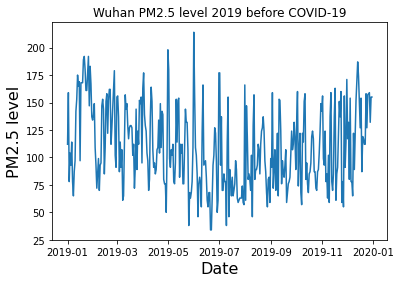

In [35]:
# pm25 2019
plt.plot(pm25w_19['Date'],pm25w_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Wuhan PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/wuhanpm25_2019.png")

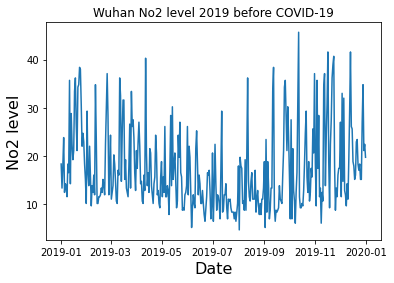

In [36]:
# no2 2019
plt.plot(no2w_19['Date'],no2w_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Wuhan No2 level 2019 before COVID-19')
plt.savefig(f"images/wuhanNo2_2019.png")

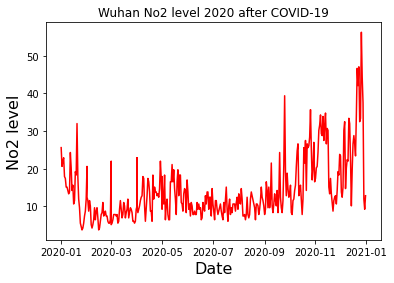

In [37]:
# no2 2029
plt.plot(no2w_20['Date'],no2w_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Wuhan No2 level 2020 after COVID-19')
plt.savefig(f"images/wuhanNo2_2020.png")

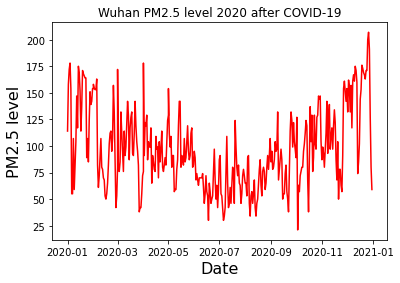

In [38]:
# pm25 2020
plt.plot(pm25w_20['Date'],pm25w_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Wuhan PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/wuhanpm25_2020.png")

In [39]:
# Melbourne comparison
pm25m_19=melbourne19_df[melbourne19_df['Specie']=='pm25'].sort_values(by='Date')
pm25m_20=melbourne20_df[melbourne20_df['Specie']=='pm25'].sort_values(by='Date')

no2m_19=melbourne19_df[melbourne19_df['Specie']=='no2'].sort_values(by='Date')
no2m_20=melbourne20_df[melbourne20_df['Specie']=='no2'].sort_values(by='Date')

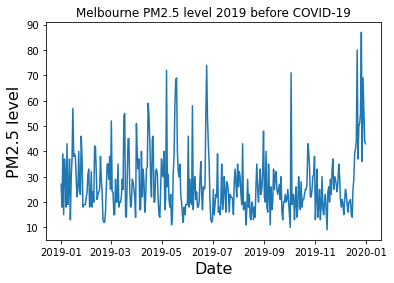

In [40]:
# pm25 2019
plt.plot(pm25m_19['Date'],pm25m_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Melbourne PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/melbournepm25_2019.png")

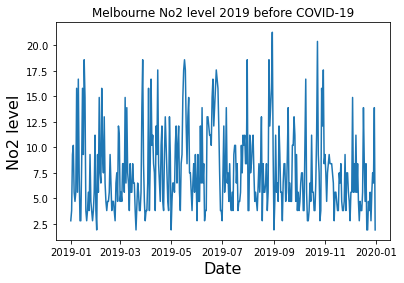

In [41]:
# no2 2019
plt.plot(no2m_19['Date'],no2m_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Melbourne No2 level 2019 before COVID-19')
plt.savefig(f"images/melbourneno2_2019.png")

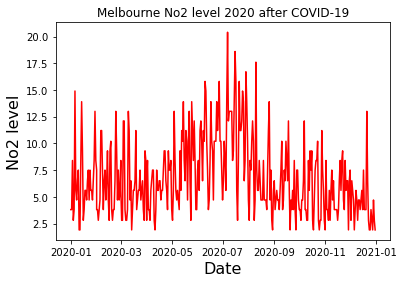

In [42]:
# no2 2020
plt.plot(no2m_20['Date'],no2m_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Melbourne No2 level 2020 after COVID-19')
plt.savefig(f"images/melbourneno2_2020.png")

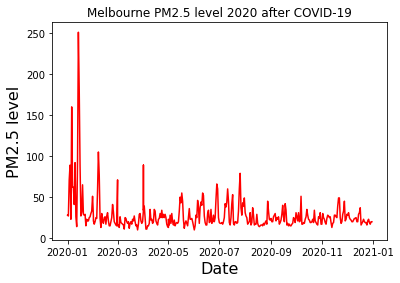

In [43]:
# pm25 2020
plt.plot(pm25m_20['Date'],pm25m_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Melbourne PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/melbournepm252020.png")

In [44]:
# Brooklyn comparison
pm25b_19=brooklyn19_df[brooklyn19_df['Specie']=='pm25'].sort_values(by='Date')
pm25b_20=brooklyn20_df[brooklyn20_df['Specie']=='pm25'].sort_values(by='Date')

no2b_19=brooklyn19_df[brooklyn19_df['Specie']=='no2'].sort_values(by='Date')
no2b_20=brooklyn20_df[brooklyn20_df['Specie']=='no2'].sort_values(by='Date')

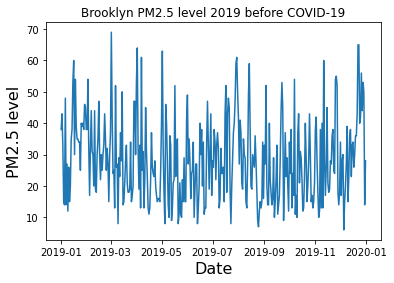

In [45]:
# pm25 2019
plt.plot(pm25b_19['Date'],pm25b_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Brooklyn PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/brooklynpm25_2019.png")

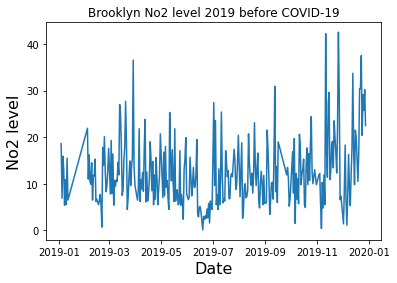

In [46]:
# no2 2019
plt.plot(no2b_19['Date'],no2b_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Brooklyn No2 level 2019 before COVID-19')
plt.savefig(f"images/brooklynno2_2019.png")

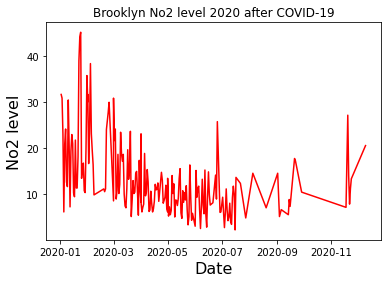

In [47]:
# no2 2020
plt.plot(no2b_20['Date'],no2b_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('No2 level', fontsize=16)
plt.title('Brooklyn No2 level 2020 after COVID-19')
plt.savefig(f"images/brooklynno2_2020.png")

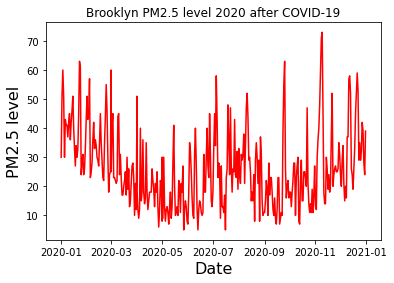

In [48]:
# pm25 2020
plt.plot(pm25b_20['Date'],pm25b_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Brooklyn PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/brooklynpm25_2020.png")

In [49]:
summary_comparison=pd.DataFrame({"Cities":["New Delhi", "Paris","Wuhan", "Melbourne", "Brooklyn"],
                                    "PM2.5 2019 Before Covid":[pm25d_19['median'].median(),pm25p_19['median'].median(),pm25w_19['median'].median(),pm25m_19['median'].median(),pm25b_19['median'].median()],
                                    "PM2.5 2020 After Covid":[pm25d_20['median'].median(),pm25p_20['median'].median(),pm25w_20['median'].median(),pm25m_20['median'].median(),pm25b_20['median'].median()],
                                    "No2 2019 Before Covid":[no2d_19['median'].median(),no2p_19['median'].median(),no2w_19['median'].median(),no2m_19['median'].median(),no2b_19['median'].median()],
                                    "No2 2020 After Covid":[no2d_20['median'].median(),no2p_20['median'].median(),no2w_20['median'].median(),no2m_20['median'].median(),no2b_20['median'].median()]})


summary_comparison.to_csv("output_csv/PM25_comparison.csv")
summary_comparison

,Cities,PM2.5 2019 Before Covid,PM2.5 2020 After Covid,No2 2019 Before Covid,No2 2020 After Covid
0,New Delhi,155.0,151.0,NaN,NaN
1,Paris,40.0,38.0,16.4,12.0
2,Wuhan,105.5,89.0,14.7,11.5
3,Melbourne,24.0,23.0,6.5,5.6
4,Brooklyn,27.0,24.0,10.9,10.4


# Litesh

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import datetime
from pprint import pprint
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [71]:
parent_folder = 'historical_data'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

In [72]:
master_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [73]:
# Read in Covid Data
covid_df = pd.read_csv("output_csv/covid_19_clean_complete.csv", parse_dates=['Date'])
# Replace NaN values by 0
covid_df.fillna(0, inplace=True)
# Remove columns
covid_df = covid_df.drop(['Lat','Long','Province/State'], axis=1)
# Rename the columns so that they make sense
covid_df.rename (columns = {'Country/Region':'Country'}, inplace = True)
covid_df.head()

,Country,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa


In [74]:
# Group datas by Country and totals for the Year
covid_df['active'] = covid_df['Confirmed'] - covid_df['Deaths'] - covid_df['Recovered']
top = covid_df[covid_df['Date'] == covid_df['Date'].max()]

world = top.groupby('Country')['Confirmed','active','Deaths'].sum()
world = top.groupby('Country')['Confirmed','active','Deaths'].sum().reset_index()

#world wide count
world.head(200)

,Country,Confirmed,active,Deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [75]:
#plot world map
figure = px.choropleth(world, locations="Country", locationmode='country names' 
                       , color="active",hover_name="Country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Active Cases in World")
figure.show()

In [76]:
#Calculate totals 
world_numbers = []
total_deaths = [] 
total_recovered = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = covid_df.Confirmed.sum()
recovered_sum = covid_df.Recovered.sum()
death_sum = covid_df.Deaths.sum()
world_numbers.append(confirmed_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [77]:
#Print Output
print ('Total Confirmed Cases = '+ str(confirmed_sum))
print ('Total Recovered Cases = '+ str(recovered_sum))
print ('Total Deaths Cases = '+ str(death_sum))
print ('Total Recovery Rate(%) = '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%) = '+ str(mean_mortality_rate*100))

Total Confirmed Cases = 828508482
Total Recovered Cases = 388408229
Total Deaths Cases = 43384903
Total Recovery Rate(%) = 46.88041672939686
Total Fatality Rate(%) = 5.23650680018023


In [78]:
#Group by top 20 Countries and status of COVID infections 
top = top.groupby('Country').sum()
top_active = top.sort_values('active', ascending=False).reset_index()
top_active.head(20).style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths,Recovered,Active,active
0,US,4290259,148011,1325804,2816444,2816444
1,Brazil,2442375,87618,1846641,508116,508116
2,India,1480073,33408,951166,495499,495499
3,United Kingdom,301708,45844,1437,254427,254427
4,Russia,816680,13334,602249,201097,201097
5,South Africa,452529,7067,274925,170537,170537
6,Colombia,257101,8777,131161,117163,117163
7,France,220352,30212,81212,108928,108928
8,Canada,116458,8944,0,107514,107514
9,Peru,389717,18418,272547,98752,98752


In [79]:
top_active = top_active.head(20)

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

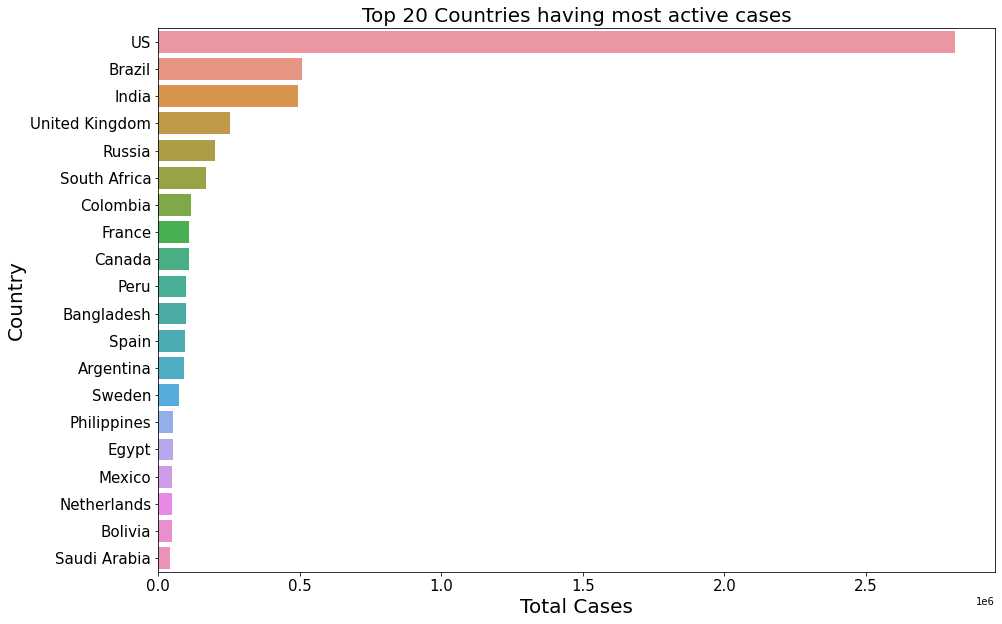

In [80]:
#PLOTTING top 20 active cases country
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 20 Countries having most active cases",fontsize=20)
ax = sns.barplot(x=top_active.active,y=top_active.Country)
ax.set(xlabel="Total Cases",ylabel="Country")